In [13]:
# импорт необходимых библиотек для работы с данными и их визуализацией
import os as os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from itertools import product
import matplotlib.pylab as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
sns.set()

In [14]:
df = pd.read_csv(r'data_classification_for_task.csv')

## Data exploration

In [15]:
# Look into first rows of the dataset
# there are 13 feature columns and 1 target column
df.head()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# in total, there are 303 rows (samples)
df.shape

(303, 14)

In [5]:
# let us look into features datatype, and confirm that everything is ok
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# All features have datatypes as they supposed to have
# From the number of non-null values, we can see that there are no missed attributes,
# Yet we can check it with .isna() function

In [7]:
# No NA values
df.isna().sum()

AGE           0
GENDER        0
FEATURE_1     0
FEATURE_2     0
FEATURE_3     0
FEATURE_4     0
FEATURE_5     0
FEATURE_6     0
FEATURE_7     0
FEATURE_8     0
FEATURE_9     0
FEATURE_10    0
FEATURE_11    0
TARGET        0
dtype: int64

In [8]:
# let us look into statistics of the dataset
df.describe()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# From this distribution, we can see that there are surely:
# 5 numerical features AGE, FEATURES (2, 3, 6, 8),
# 9 categorical GENDER, FEATURES (1,4,5,7,9,10,11) and TARGET.

[]

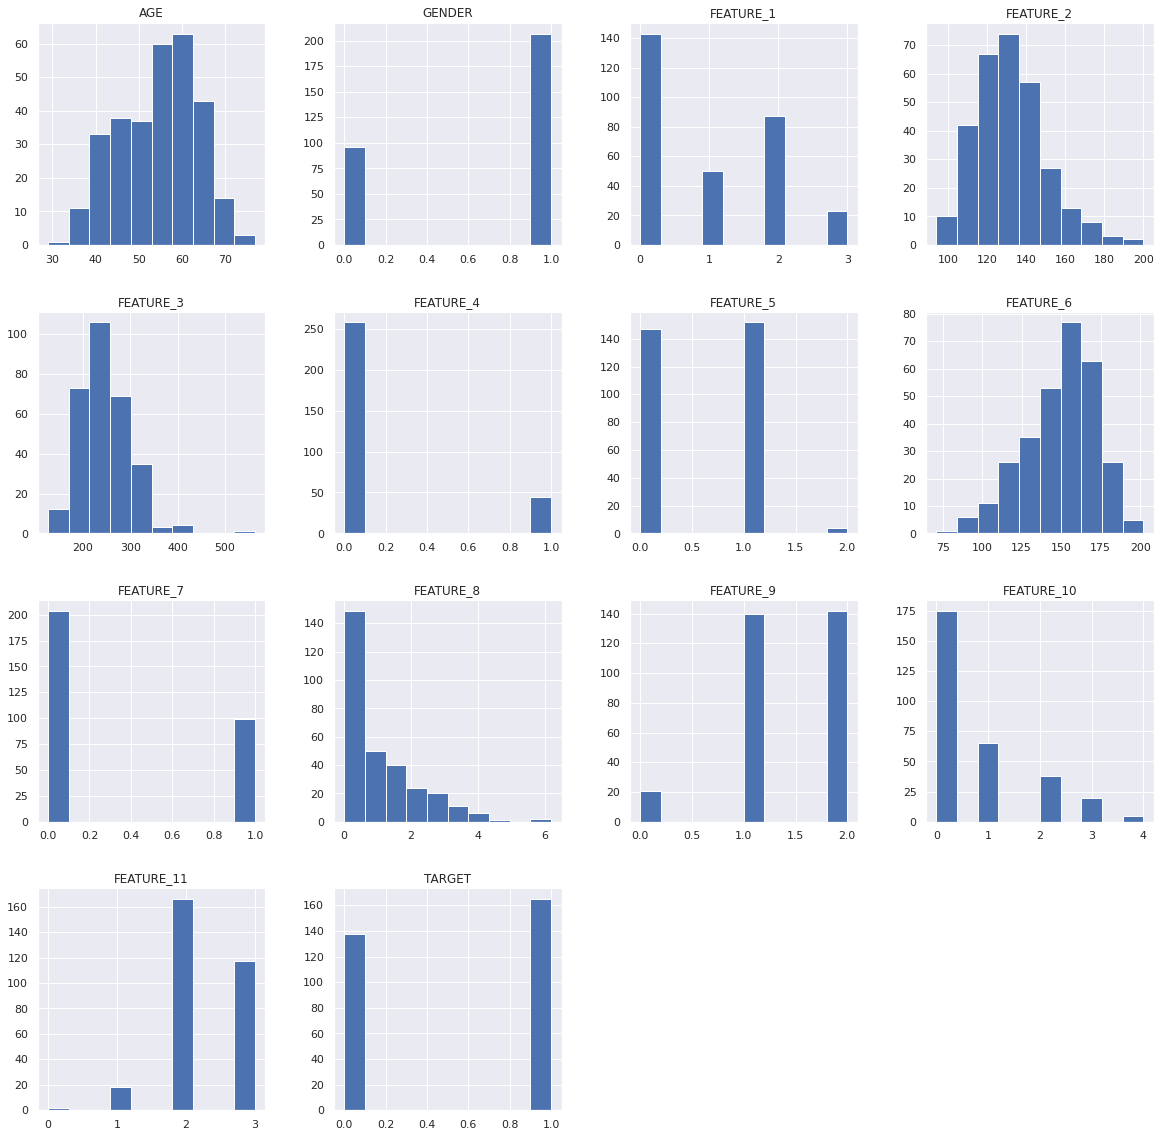

In [16]:
# let us plot the histogram of each feature,
# in this way we will confirm that categorical features are categorical
# and look into distibution of each feature
df.hist() 
plt.plot()

1    165
0    138
Name: TARGET, dtype: int64

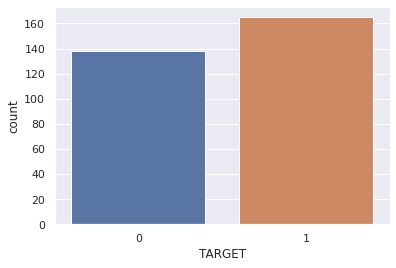

In [ ]:
sns.countplot(x = 'TARGET', data = df)
df['TARGET'].value_counts()

In [17]:
# Sometimes the distribution of a feature is very imbalanced, and the minority class
# is just 1-2 samples
# In this way, we can remove such feature, since it does not give any input to the model
# Therefore, feature to be questioned:
# FEATURE 4 - class 1 is much lower

# Overall, all features are quite imbalanced, yet the distribution of numerical features resemble skewed normal distibution:)

In [18]:
# finally, let us define categorical and numerical features
numerical_features = ['AGE', 'FEATURE_2','FEATURE_3', 'FEATURE_6', 'FEATURE_8']
categorical_features = ['GENDER','FEATURE_1', 'FEATURE_4','FEATURE_5', 'FEATURE_7', 'FEATURE_9', 'FEATURE_10', 'FEATURE_11']

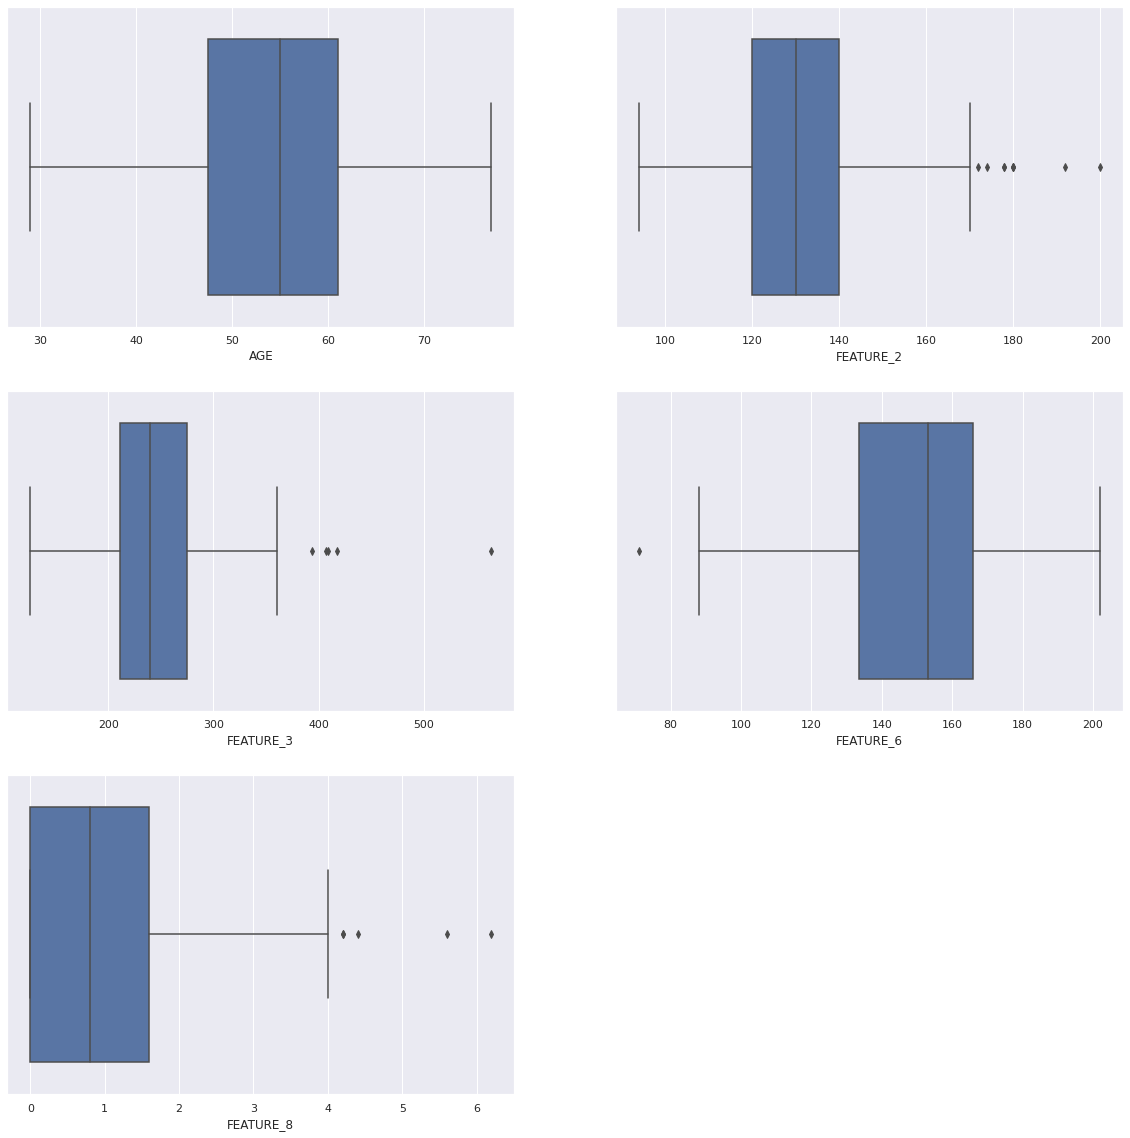

In [19]:
# let us plot a boxplot for numerical values to look into ouliers closely
for i, column in enumerate(numerical_features, start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column)

In [20]:
# In my opinion, the 'outliers' for most of features are not that significant,
# Perhaps, we can remove only Feature_3 right most outlier

# I would make a hypothesis and assume that features 2 and 6 correspond to blood pressure or something similar

In [21]:
df = df.drop(df[df['FEATURE_3'] > 500].index)

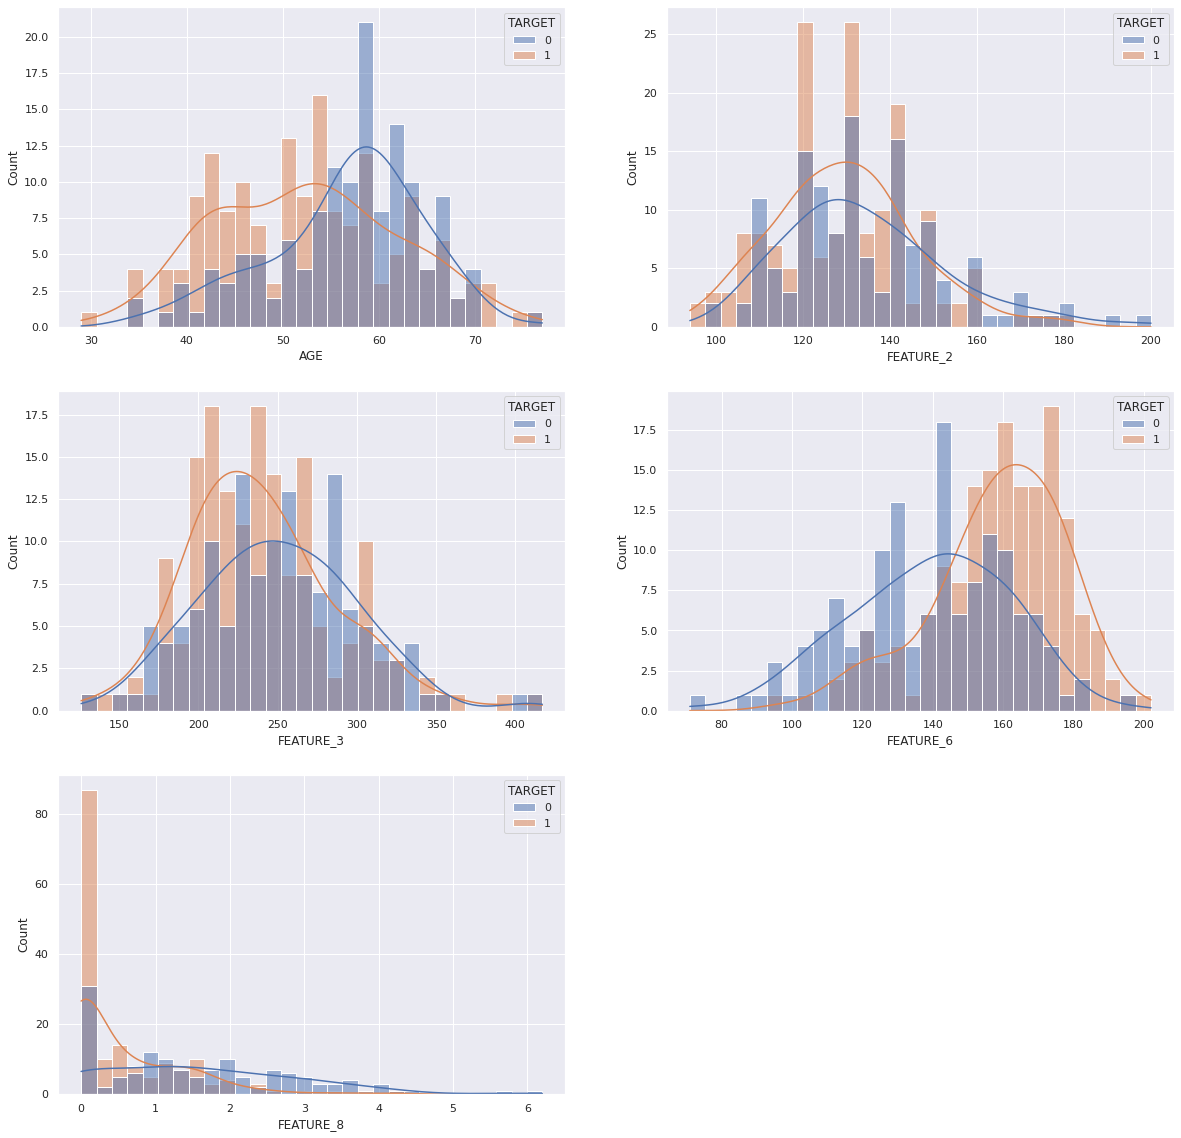

In [22]:
# let us not look closely into distibution for each numerical column for each 
# label in the target - 0 or 1.
for i, column in enumerate(numerical_features, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(x=column,hue="TARGET", data=df, bins=30, kde=True)
    plt.xlabel(column)

In [23]:
# from here we may conclude:

# AGE - people between 50-60 years a much likely to have heart disease, 
# a lot of data for people, who are above ~55 years old, maybe this is connected to that most people start
# to concern about their health at this age 

# FEATURE_2 - values between 120 and 140 have a high rise in patients samples

# FEATURE_3 - above 200 is a high rise of patient samples

# FEATURE_6 - above 150 is a high rise of patients

# FEATURE_8 - A lot of imbalance in data actually, yet, value 0 implies a very high risk of heart disease

# in this way we defined some intuitive 'thresholds' for each feature

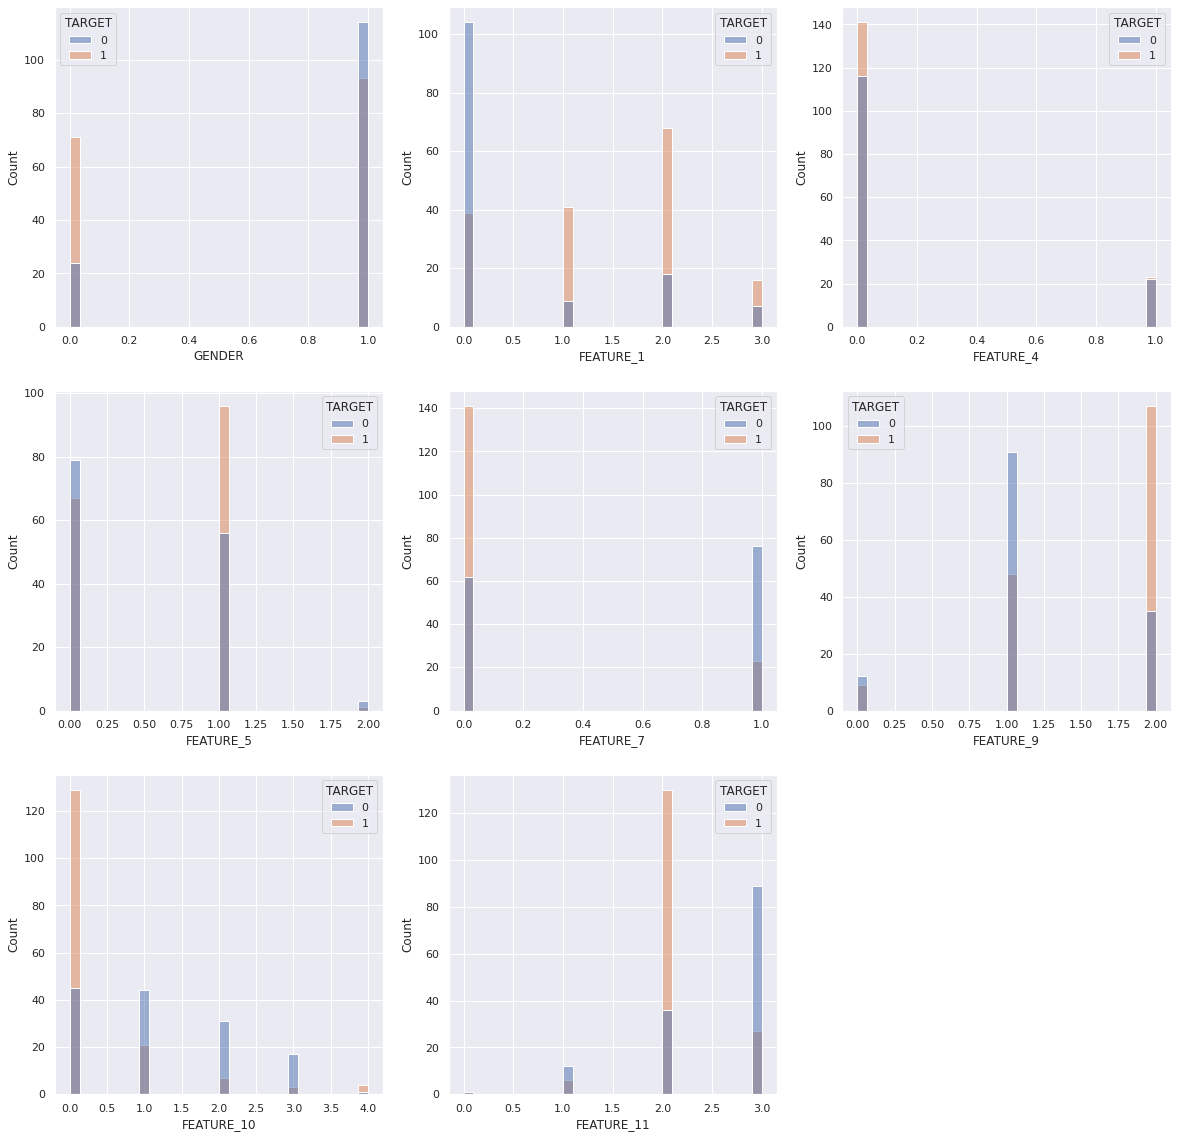

In [24]:
for i, column in enumerate(categorical_features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(x=column,hue="TARGET", data=df, bins=30)
    plt.xlabel(column)

In [ ]:
# GENDER - gender with value 0 has higher chance of having heart disease, compared to gender 1

# FEATURE_1 - values 1 and 2 imply a high chance of having a heart disease

# FEATURE_4 - actually almost balanced for each value (need to check with correlation to the target)

# FEATURE_5 - value 1 implies a higher risk of heart disease

# FEATURE_7 - value 0 implies a very high risk of heart disease

# FEATURE_9 - value 2 implies a very high risk of heart disease

# FEATURE_10 - value 0 implies a very high risk of heart disease

# FEATURE_11 - value 2 implies a very high risk of heart disease

In [25]:
# From all of the observations there's 1 feature to the question:
# FEATURE_4

## Looking into feature correlations (Feature selection)

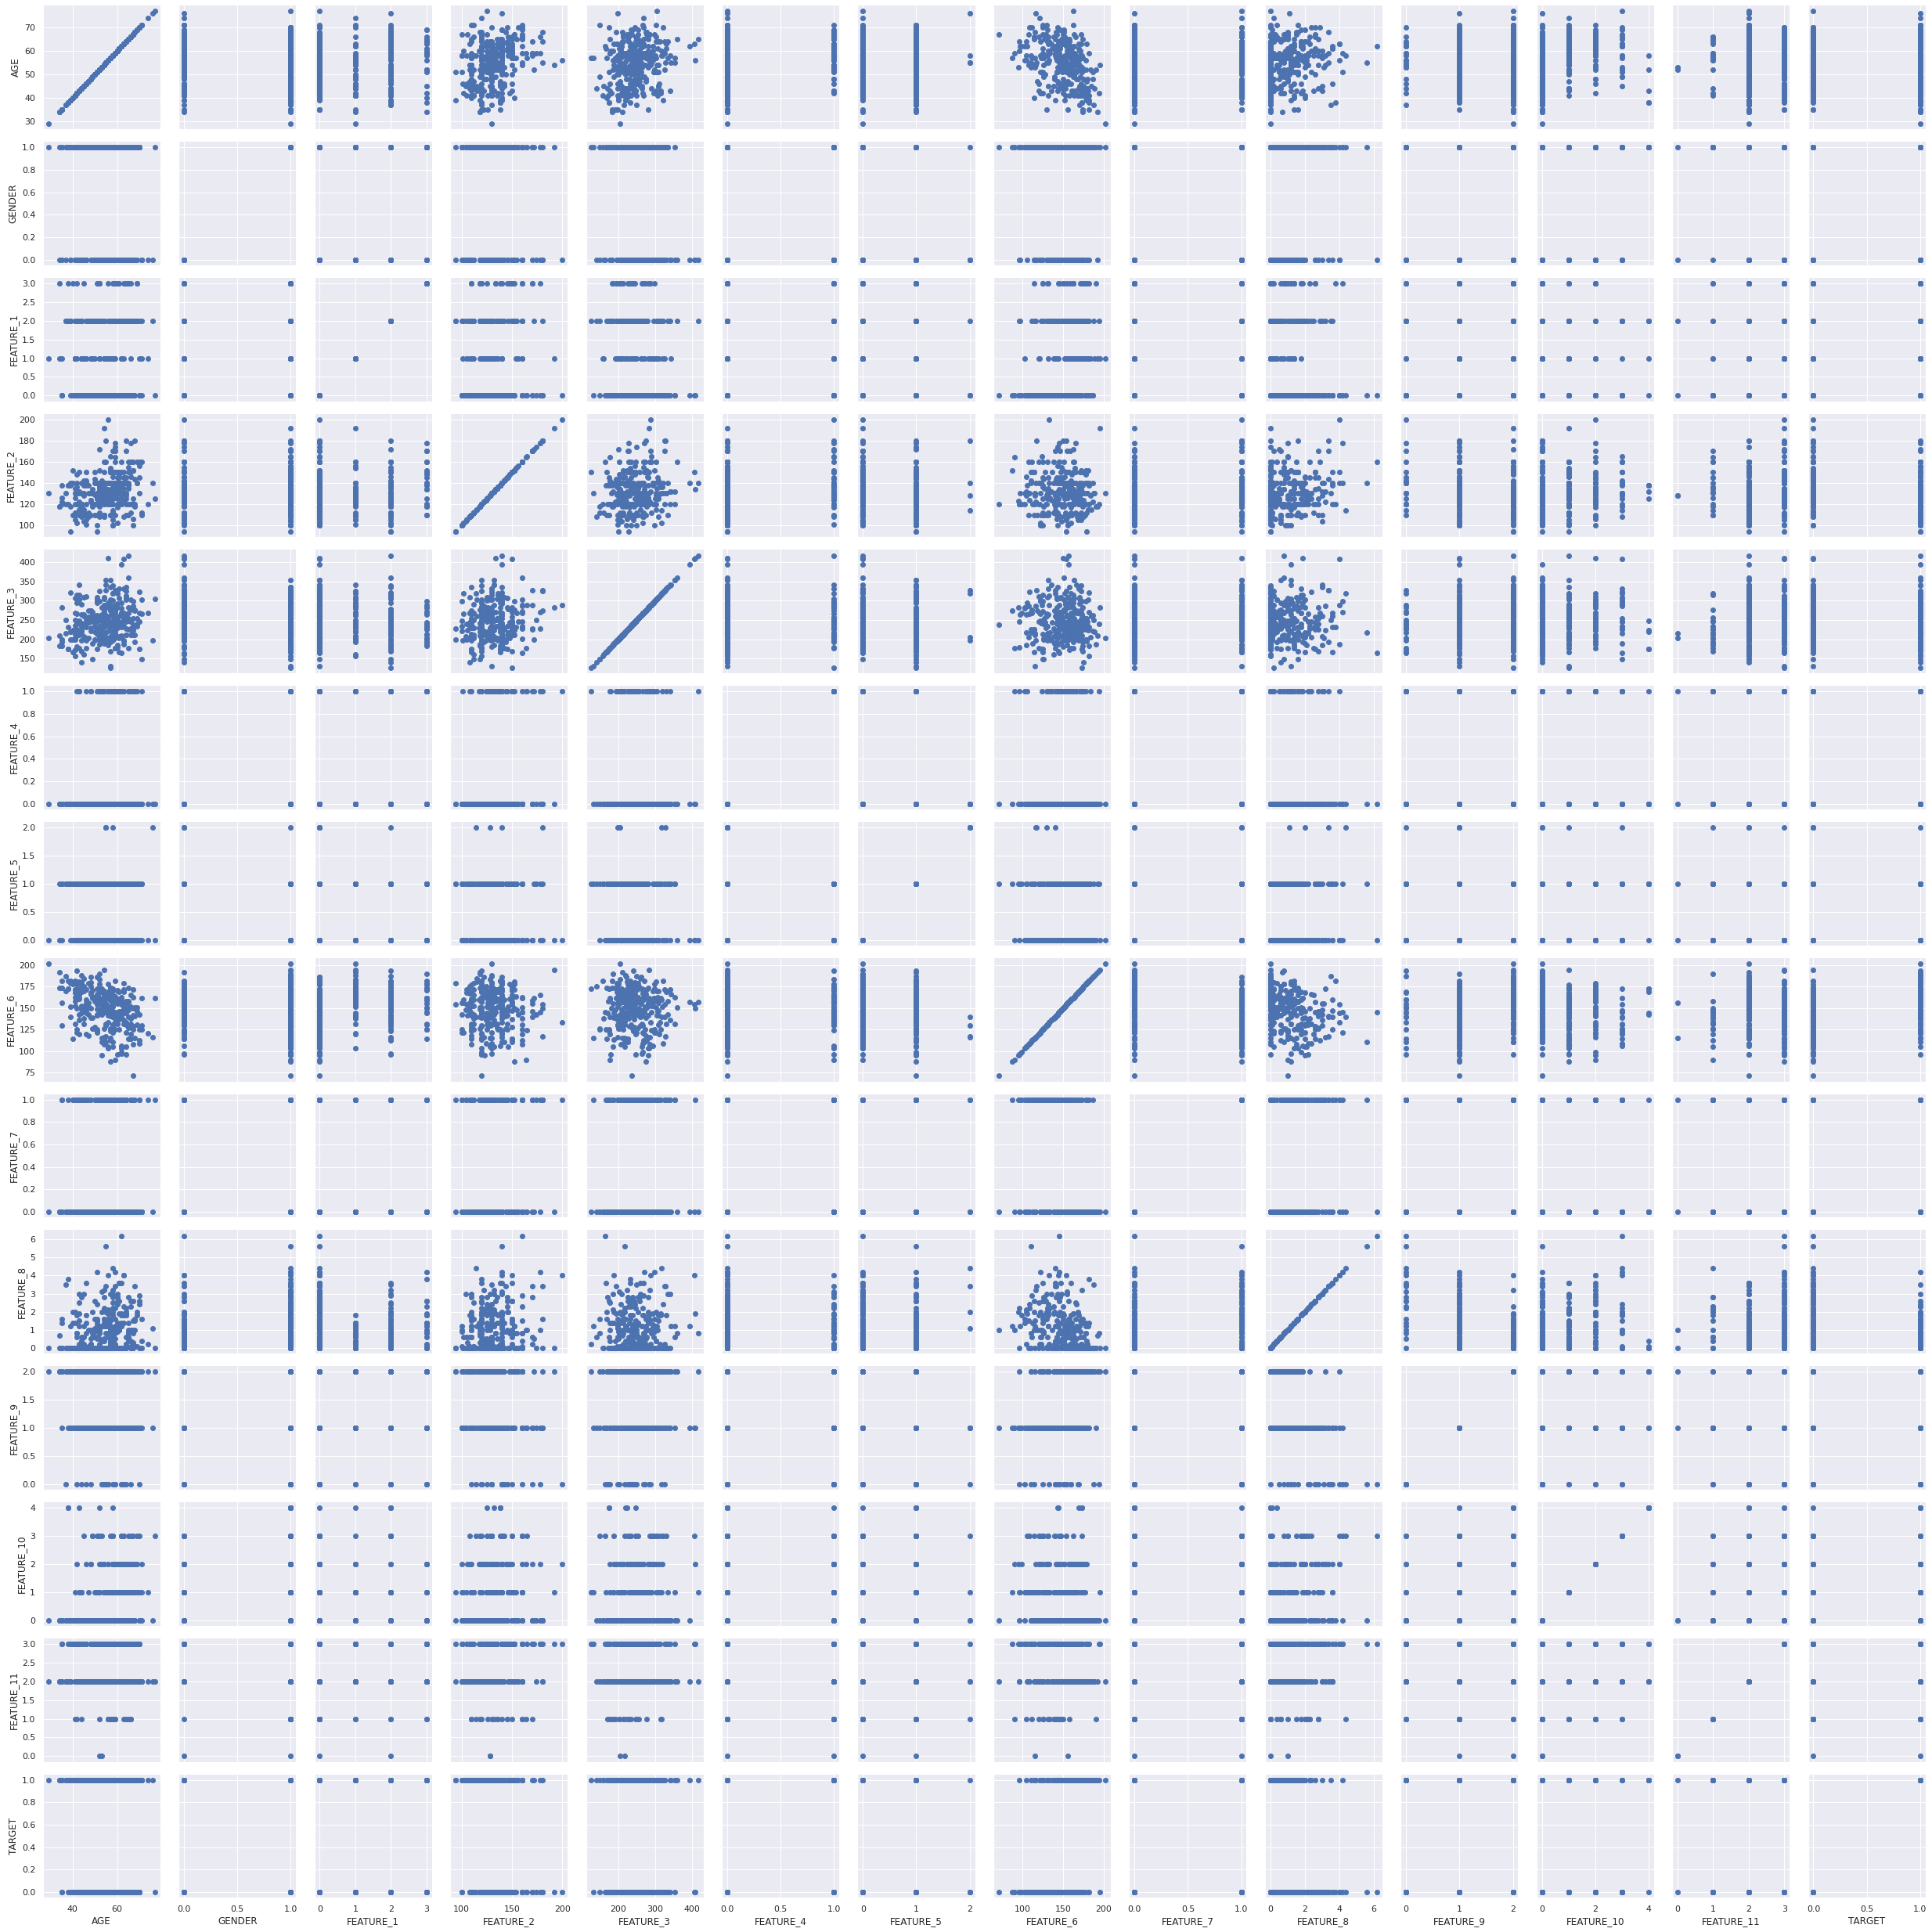

In [26]:
# let us plot pair correlation graphs
pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

In [27]:
# AGE and FEATURE_6 look correlated

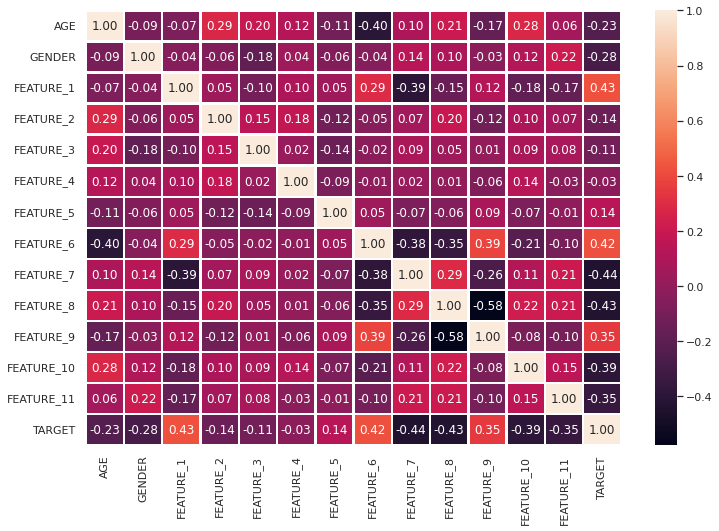

In [28]:
# plotting a covariance matrix
corr = df.corr()
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [30]:
# indeed there is some correlation btw AGE and FEATURE_6, but
# most significat correlation is within FEATURE_8 and FEATURE_9 (confirm on next step)
# moreover, FEATURE_3 and FEATURE_4 have very low correlation with TARGET variable

In [34]:
# correlation for categorical + numerical values
# is better calculated with eta value (image below)

# yet it supposed to produce somthing similar
def correlation_ratio(categories, measurements):
    # getting number of values and creating a grid
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(0,cat_num):
        cat_measures = measurements.iloc[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    # calculating y avg, numerator and denominator
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        # getting a squre root
        eta = np.sqrt(numerator/denominator)
    return eta

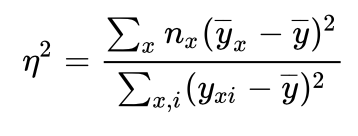

In [75]:
# get all categorical values
cat_var = categorical_features + ['TARGET']
# get all numerical values
num_var = numerical_features
# get all pairs of these values
cat_var_prod = list(product(cat_var,num_var, repeat = 1))

result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    # for each pair call function for correlation
    result.append((i[0],i[1],correlation_ratio(df[i[0]], df[i[1]])))
    
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
# convert the above dataframe into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,AGE,FEATURE_2,FEATURE_3,FEATURE_6,FEATURE_8
var1,,,,,
FEATURE_1,0.184421,0.167716,0.105065,0.388856,0.355235
FEATURE_10,0.406915,0.130423,0.176893,0.310377,0.323370
FEATURE_11,0.137504,0.152028,0.113498,0.308939,0.345122
FEATURE_4,0.123668,0.176532,0.023294,0.007946,0.006420
FEATURE_5,0.170745,0.155732,0.166148,0.150446,0.205836
FEATURE_7,0.100419,0.065577,0.086855,0.378200,0.289683
FEATURE_9,0.189929,0.136339,0.047559,0.454488,0.578955
GENDER,0.092298,0.061698,0.180288,0.041983,0.098835
TARGET,0.230720,0.142466,0.111147,0.421096,0.432927


In [ ]:
# There is indeed a correlation:
# FEATURE_8 & FEATURE_9 - quite high

In [76]:
# to compare categorical values with categorical
# we can use chi-squred test, with hypothesis that values are uncorrelated (p=0.05)

# get all categrical features
df_cat = df[categorical_features + ['TARGET']]
df_cat.head()

cat_var1 = categorical_features + ['TARGET']
cat_var2 = categorical_features + ['TARGET']

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    # for each pair call function for correlation
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                df_cat[i[0]], df_cat[i[1]])))[1]))
    
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
# convert the above dataframe into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,FEATURE_1,FEATURE_10,FEATURE_11,FEATURE_4,FEATURE_5,FEATURE_7,FEATURE_9,GENDER,TARGET
var1,,,,,,,,,
FEATURE_1,NaN,7.380610e-04,2.392781e-06,0.260917,0.124226,2.044956e-14,8.816726e-05,9.565049e-02,1.892684e-17
FEATURE_10,7.380610e-04,NaN,1.911817e-02,0.122508,0.251058,1.346358e-02,1.596691e-01,1.080782e-01,3.650913e-15
FEATURE_11,2.392781e-06,1.911817e-02,NaN,0.134969,0.746591,2.428412e-07,4.786032e-06,5.188769e-10,1.081036e-18
FEATURE_4,2.609168e-01,1.225080e-01,1.349694e-01,NaN,0.306574,7.967030e-01,1.886281e-01,5.644976e-01,7.611375e-01
FEATURE_5,1.242257e-01,2.510585e-01,7.465914e-01,0.306574,NaN,2.120832e-01,2.997090e-02,1.471633e-01,5.653595e-03
FEATURE_7,2.044956e-14,1.346358e-02,2.428412e-07,0.796703,0.212083,NaN,2.819817e-06,2.251549e-02,9.556466e-14
FEATURE_9,8.816726e-05,1.596691e-01,4.786032e-06,0.188628,0.029971,2.819817e-06,NaN,7.297915e-01,3.156748e-11
GENDER,9.565049e-02,1.080782e-01,5.188769e-10,0.564498,0.147163,2.251549e-02,7.297915e-01,NaN,2.545738e-06
TARGET,1.892684e-17,3.650913e-15,1.081036e-18,0.761137,0.005654,9.556466e-14,3.156748e-11,2.545738e-06,NaN


In [77]:
# as was supposed, FEATURE_4 has no affect on target (H0 is suffieced), 
# FEATURE_3 has low impact on the target variable as well (H0 is suffieced),
# FEATURE_8 and FEATURE_9 a highly correlated, which implies high varience on model

# Thus, we can remove FEATURE_8, FEATURE_4, FEATURE_3 from considering 
# Yet, I want to look, what will be the results without removing those,especially, FEATURE_3! (if i have time - ha-ha)

## Preprocessing 

In [78]:
# redefinition of features set
numerical_features = ['AGE', 'FEATURE_2', 'FEATURE_8','FEATURE_6']
categorical_features = ['GENDER','FEATURE_1','FEATURE_5', 'FEATURE_7', 'FEATURE_10', 'FEATURE_11']

In [84]:
from sklearn.model_selection import train_test_split
# removing target from the dataframe, as it is the label
train_df = df[numerical_features + categorical_features + ['TARGET']]
# since we dont know whether categorical are nominal or ordinal -> all ordinal
train_df = pd.get_dummies(train_df, columns = categorical_features)
X = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']
# splitting dataset into 70% - train, 30% - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
# due to some outliers, it is better to scale using stardard scaler
s_sc = StandardScaler()
# we need to fit the scaler to the TRAIN set, without seeing the test values
s_sc = s_sc.fit(X_train[numerical_features])
# after that we transfrom the train and test numerical features :) 
X_train[numerical_features] = s_sc.transform(X_train[numerical_features])
X_test[numerical_features] = s_sc.transform(X_test[numerical_features])

In [86]:
X_test.head()

,AGE,FEATURE_2,FEATURE_8,FEATURE_6,GENDER_0,GENDER_1,FEATURE_1_0,FEATURE_1_1,FEATURE_1_2,FEATURE_1_3,...,FEATURE_7_1,FEATURE_10_0,FEATURE_10_1,FEATURE_10_2,FEATURE_10_3,FEATURE_10_4,FEATURE_11_0,FEATURE_11_1,FEATURE_11_2,FEATURE_11_3
180,0.139095,0.031391,0.164734,-0.832783,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
229,1.135859,-0.361530,0.684815,-0.877438,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
112,1.135859,0.480444,-0.702069,-0.788128,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
247,1.357362,1.603076,-0.875429,-1.368642,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
60,1.911119,-1.203504,-0.875429,-0.922093,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## Training

In [104]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# function that evaluates the model by f1 score
def get_classicification_metric(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  metric = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)

  print("MODEL RESULTS: ")
  print(round(metric,3))
  print("Confusion matrix")
  print(conf_matrix)

### Default models (BEST MODEL -- Logistic regression with F1 = 0.898)

In [105]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

get_classicification_metric(lr_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.898
Confusion matrix
[[37  5]
 [ 5 44]]


In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

get_classicification_metric(knn_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.887
Confusion matrix
[[37  5]
 [ 6 43]]


In [107]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

get_classicification_metric(svm_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.848
Confusion matrix
[[38  4]
 [10 39]]


In [108]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

get_classicification_metric(tree_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.792
Confusion matrix
[[33  9]
 [11 38]]


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

get_classicification_metric(rf_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.872
Confusion matrix
[[38  4]
 [ 8 41]]


### Hyperparameter tuning (Grid search) BEST MODEL -- Logistic regression with F1 = 0.907

In [110]:
from sklearn.model_selection import GridSearchCV

#### LR

In [ ]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ['lbfgs', 'liblinear'],
          "penalty": ['none', 'l1', 'l2']}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="f1_weighted", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

In [121]:
get_classicification_metric(lr_clf, X_train, y_train, X_test, y_test)

MODEL RESULTS: 
0.907
Confusion matrix
[[38  4]
 [ 5 44]]


#### SVM

In [123]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

get_classicification_metric(svm_clf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}
MODEL RESULTS: 
0.831
Confusion matrix
[[39  3]
 [12 37]]


#### Decision tree

In [133]:
# for decision tree or random forest dataset is too simple, thus, we need to search for a non-complex tree
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[3, 4, 5], 
          "min_samples_leaf":list(range(5, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1_weighted", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

get_classicification_metric(tree_clf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 3420 candidates, totalling 17100 fits
Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'splitter': 'random'}
MODEL RESULTS: 
0.83
Confusion matrix
[[36  6]
 [10 39]]


#### RFC

In [134]:
n_estimators = [500, 900, 1100]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1_weighted", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

get_classicification_metric(rf_clf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
MODEL RESULTS: 
0.863
Confusion matrix
[[37  5]
 [ 8 41]]


#### KNN

In [132]:
n_neighbors = [x for x in range(3,12)]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

params_grid = {
    "n_neighbors": n_neighbors, 
    "weights": weights,
    "metric":metric}

knn_clf = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_clf, params_grid, scoring="f1_weighted", cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)
best_params = knn_cv.best_params_
print(f"Best parameters: {best_params}")

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train, y_train)

get_classicification_metric(knn_clf, X_train, y_train, X_test, y_test) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
MODEL RESULTS: 
0.822
Confusion matrix
[[38  4]
 [12 37]]
